In [2]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Project Final Report: Do Age and Hours Played Affect if a Player is Subscribed

## **Introduction:**

A group in CS at UBC is interested in understanding how people play video games. They've set up a server running MineCraft and are recording play sessions. Running the server is not easy: need to have the right hardware resources, software licenses, recruiting efforts, etc. Our task is to formulate and answer a predictive question about the data. Present the full analysis, from reading the data to communicating results. 

The question we our trying to asnwer is: Can the number of hours played and the age of players accurately predict whether or not a given player is subscribed to the newsletter in this dataset?

**Data Description:** In the players dataset read from players.csv, there are 196 observations each comprised of 7 variables. Eash observation represents an individual player from the Minecraft server.
- The first variable titled experience is a character variable showing the playing experience of each player like amateur, beginner, regular, veteran, and pro.
- The next variable titled subscribe is a logical variable showing whether or not each player has subscribed to a certain game-related newsletter.
- The next variable titled hashedEmail is a character variable showing the hashed format of each player's email address.
- The next variable titled played_hours is a double quantitative variable showing how many hours each players played the game for. The average number of hours played is 5.85 spanning a range from 0.0 to 223.1 hours.
- The next variable titled name is a character variable containing the first name of each player.
- The next variable titled gender is a character variable showing the preffered gender of each player not just limited to Male, Female, and Other.
- The last variable titled Age is a double quantitative variable showing the age of each player. The average age is 20.52 years old spanning a range from 8 to 50 years old.
- 
Some potential issues with the data may stem from the fact that the hashedEmails are coded in a way that they are almost unusable as data, the fact that there are many players who played the game for a recorded 0.0 hours, the fact that the gender variable seems to have been customizeable by the players meaning that any value could be put into the variable, and the fact that there are some values of NA for the Age variable.

## **Methods and Plan:**

I will be using the k-nearest neighbors classification method to find out whether or not time played and age can predict if a player has subscribed to the newsletter. I am choosing to use the k-nearest neighbors classification method because the predictors are two quantitative variables trying to predict a categorical variable so the variables fit the model. A potential weakness in the method may be that the distribution of time played is so right-skewed with so many values at or around 0 that it may cause some error in the classification model. I will center and scale both the played_hours and age variables before inputting them into the model, after which I will split the data into training and testing groups with a 75/25 split. Afterwards, a validation set will be created and cross-validation will be used to find the best fitting model to the data.

**Questions:**

Broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific: Can the number of hours played and the age of players accurately predict whether or not a given player is subscribed to the newsletter in this dataset?

I will use the k-nearest neighbors classification model using the hours_played and Age variables to predict the outcome of the subscribe variable. Using the two numerical variables to predict a categorical variable will accurately fit the outline of the k-nearest neighbors prediction method.

**Exploratory Data Analysis and Visualization:**

Reading in and tidying the players dataset:

In [3]:
library(tidyverse)
players <- read_csv("https://raw.githubusercontent.com/brendancfellows/project_planning/refs/heads/main/players.csv")
head(players)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

Table of mean values for each quantitative variable:

In [4]:
tidy_players <- players |>
    rename(hashed_email = hashedEmail, age = Age) |>
    mutate(subscribe = as.factor(subscribe)) |>
    filter(!is.na(age))
head(tidy_players)

experience subscribe
1 Pro        TRUE     
2 Veteran    TRUE     
3 Veteran    FALSE    
4 Amateur    TRUE     
5 Regular    TRUE     
6 Amateur    TRUE     
  hashed_email                                                     played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

In [5]:
means <- tidy_players |>
    summarize(played_hours = mean(played_hours), age = mean(age, na.rm = TRUE))
means

played_hours age     
1 5.904639     20.52062

Exploratory visualizations:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


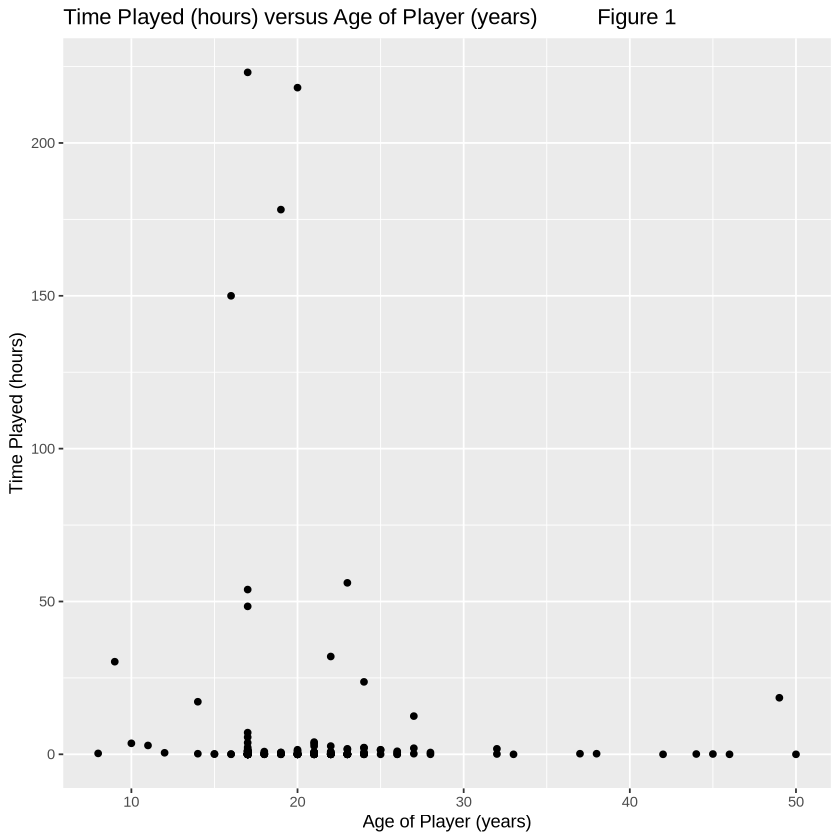

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


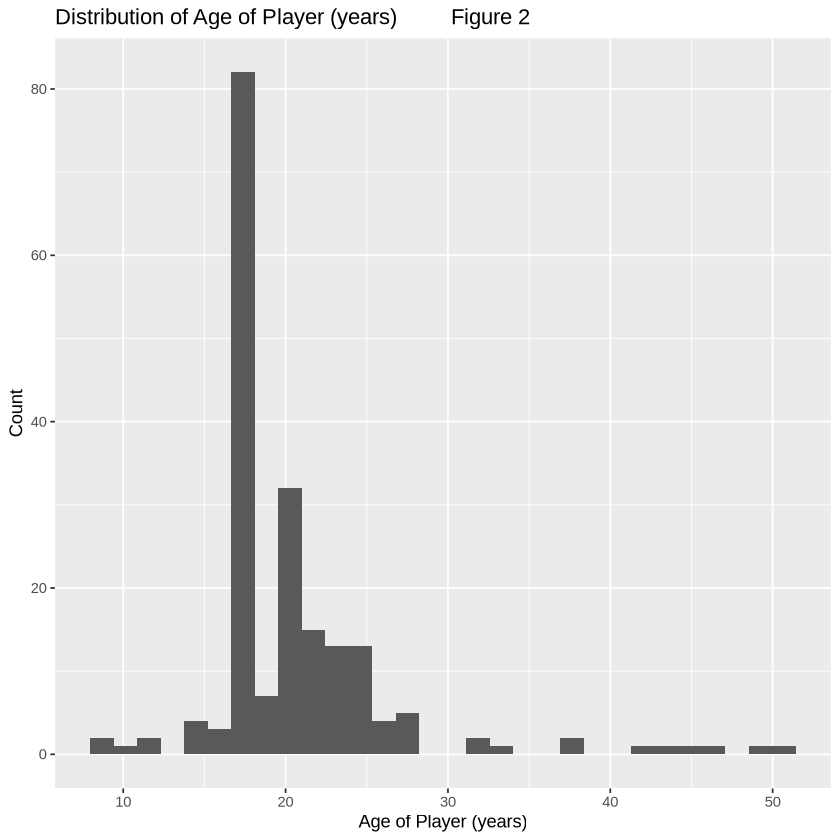

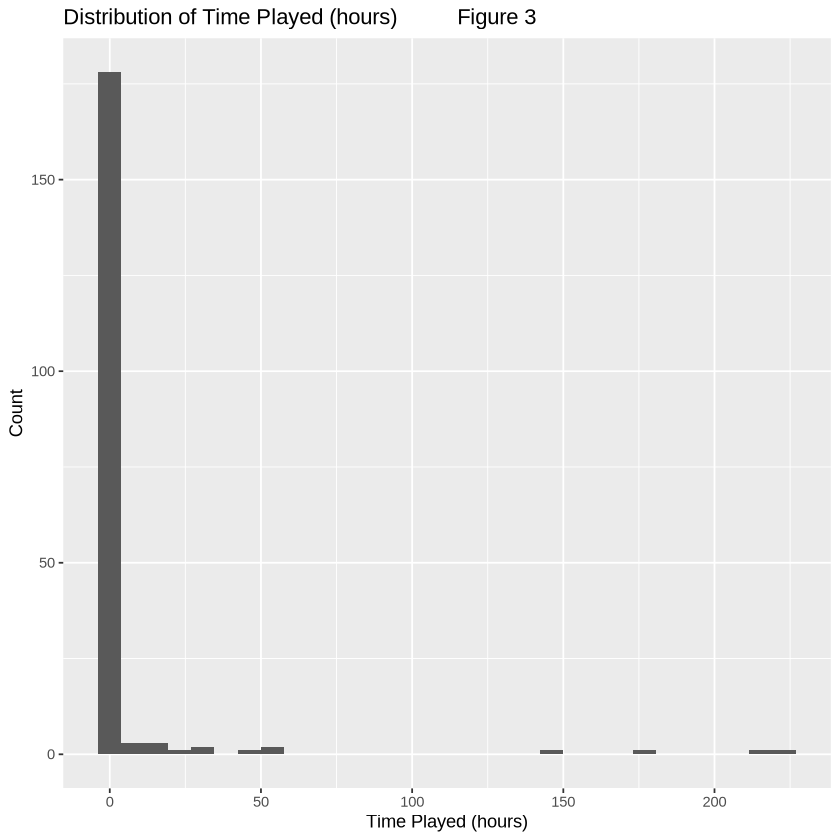

In [6]:
hours_vs_age <- tidy_players |>
    ggplot(aes(x = age, y = played_hours)) +
    geom_point() +
    labs(x = "Age of Player (years)", y = "Time Played (hours)") +
    ggtitle("Time Played (hours) versus Age of Player (years)          Figure 1")
hours_vs_age

age_dist <- tidy_players |>
    ggplot(aes(x = age)) +
    geom_histogram() +
    labs(x = "Age of Player (years)", y = "Count") +
    ggtitle("Distribution of Age of Player (years)         Figure 2")
age_dist

hours_dist <- tidy_players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram() +
    labs(x = "Time Played (hours)", y = "Count") +
    ggtitle("Distribution of Time Played (hours)          Figure 3")
hours_dist

Data Analysis:

neighbors .metric  .estimator mean      n std_err    .config               
1 1         accuracy binary     0.4958456 5 0.03403844 Preprocessor1_Model001
2 2         accuracy binary     0.4958456 5 0.03403844 Preprocessor1_Model002
3 3         accuracy binary     0.5572250 5 0.03730974 Preprocessor1_Model003
4 4         accuracy binary     0.5712644 5 0.02961862 Preprocessor1_Model004
5 5         accuracy binary     0.6192775 5 0.05569092 Preprocessor1_Model005
6 6         accuracy binary     0.5916913 5 0.04915411 Preprocessor1_Model006

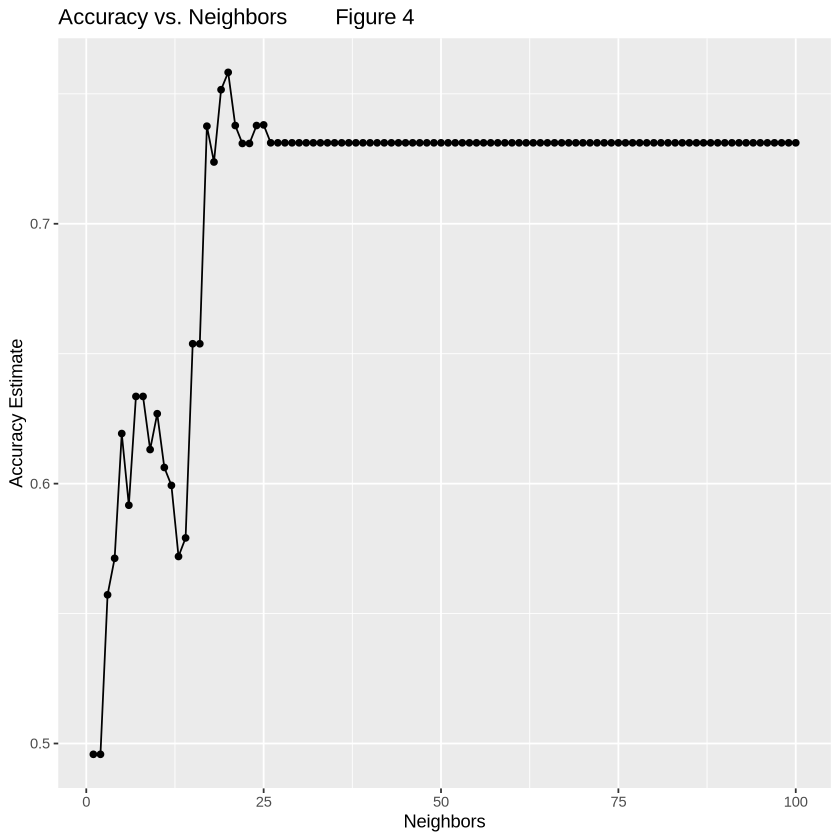

In [7]:
set.seed(3312)

players_split <- initial_split(tidy_players, prop = 0.75, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

players_recipe <- recipe(subscribe ~ age + played_hours, data = players_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

players_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- players_results |>
    filter(.metric == "accuracy")

head(accuracies)

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() + 
    geom_line() + 
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Accuracy vs. Neighbors        Figure 4")
accuracy_vs_k


In [8]:
set.seed(3312)
best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
best_k

[1] 20

In [9]:
players_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec_2) |>
    fit(data = players_training) 

players_test_predictions <- predict(knn_fit, players_testing) |>
    bind_cols(players_testing)

players_metrics <- players_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
players_metrics 

confusion <- players_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
confusion

.metric  .estimator .estimate
1 accuracy binary     0.755102

          Truth
Prediction FALSE TRUE
     FALSE     1    0
     TRUE     12   36

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


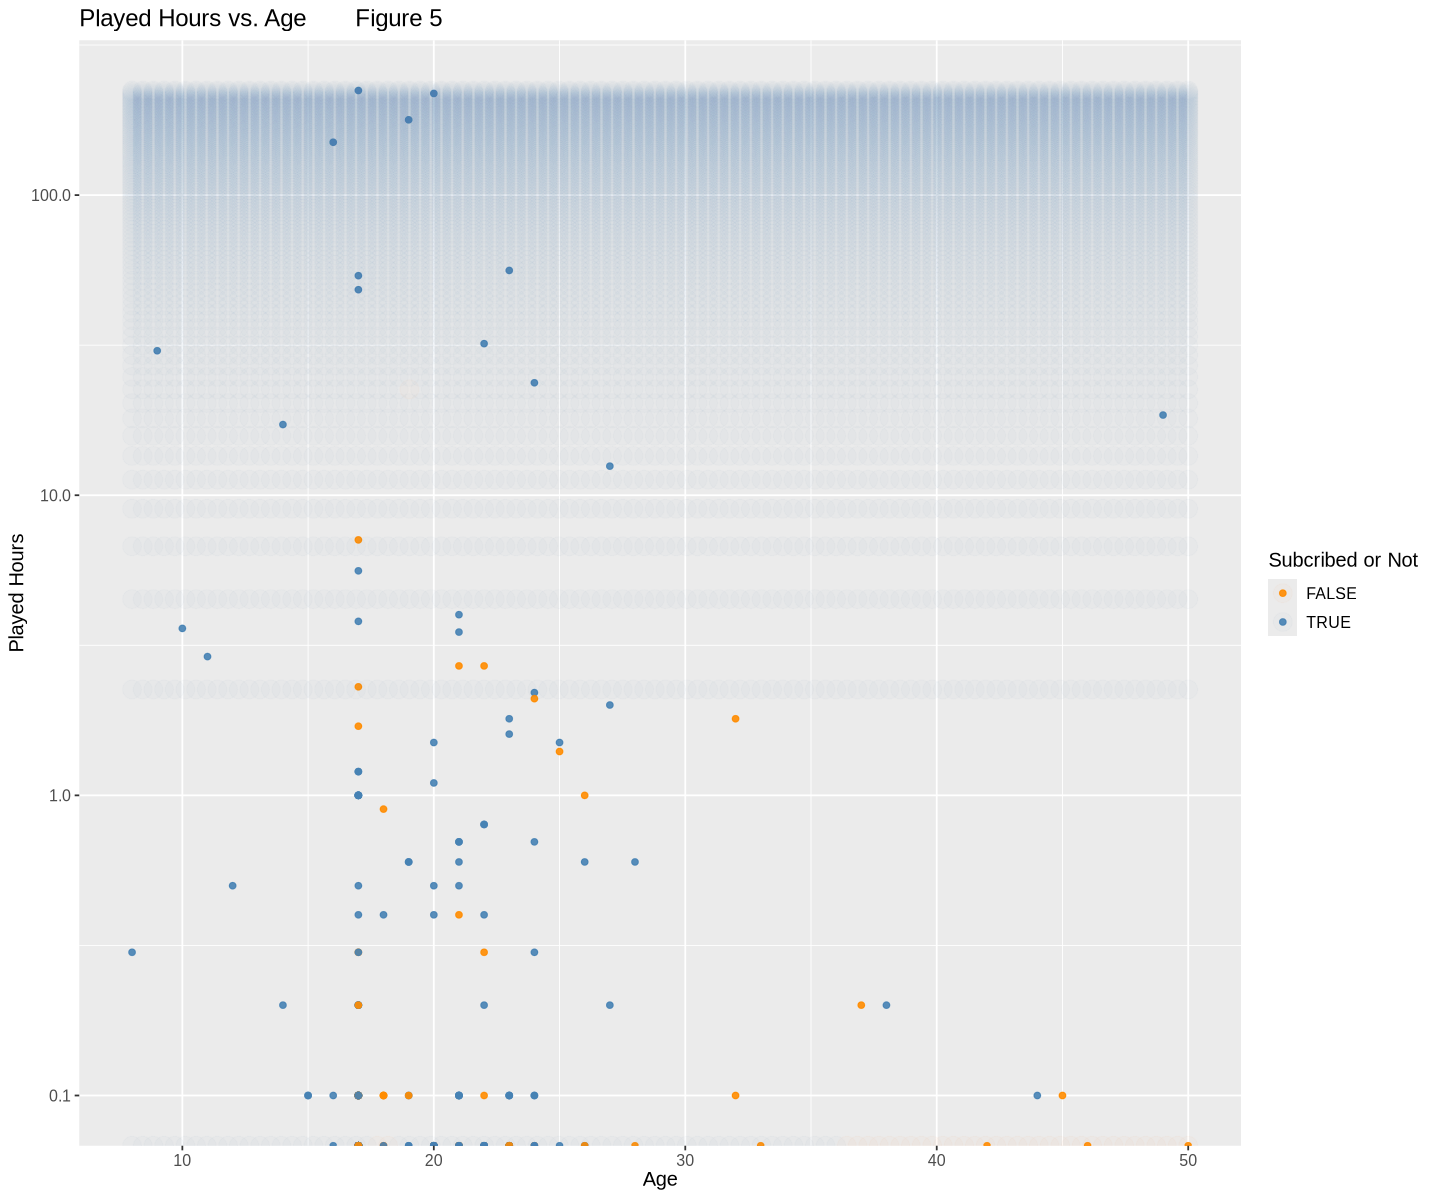

In [10]:
age_grid <- seq(min(tidy_players$age),
                max(tidy_players$age),
                length.out = 100)
plh_grid <- seq(min(tidy_players$played_hours),
                max(tidy_players$played_hours),
                length.out = 100)
apgrid <- as_tibble(expand.grid(age = age_grid,
                                played_hours = plh_grid))

knnPredGrid <- predict(knn_fit, apgrid)

prediction_table <- bind_cols(knnPredGrid, apgrid) |>
  rename(subscribe = .pred_class)

options(repr.plot.width = 12, repr.plot.height = 10)

wkflw_plot <-
  ggplot() +
  geom_point(data = tidy_players,
             mapping = aes(x = age,
                           y = played_hours,
                           color = subscribe),
             alpha = 0.90) +
  geom_point(data = prediction_table,
             mapping = aes(x = age,
                           y = played_hours,
                           color = subscribe),
             alpha = 0.02,
             size = 5) +
  labs(color = "Subcribed or Not",
       x = "Age",
       y = "Played Hours") +
    ggtitle("Played Hours vs. Age       Figure 5") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  scale_y_log10() +
  theme(text = element_text(size = 12))

wkflw_plot

Insights:

From these visualizations is can be gathered that there is a slight nonlinear relationship between time played and age. Generally, the players with the most time played are from within the 15 to 25 years old age range. However, this correlates with the fact that the distribution of ages follows the same trend with a unimodal shape with most players being aged somewhere between 15 and 25 years old. Also, the distribution of time played is very heavily right-skewed with almost all of the players being around 0 hours played.

## Discussion

Summarize: The older the player is and given that they played zero hours, they will most likely not subscribe. 

Expected? Yes, it makes sense that if they are not contributing any hours, they will not subscribe. Also, since they are also older, they are less likely to be interested in video games in general. 

Impact: Cater the advertisement and subscription to younger people, as they are more likely to subscribe and commit more hours to the game. Spend less time and effort catering to older players, as they will not subscribe and play the game. 

Future Questions: How can we get older people to play more video games? What makes it so enticing to younger audiences? How would this change if older people were spending more hours playing? 